In [1]:
#1) import the modules, libraries and packages that you need 
#(numpy, pandas, matplotlib.pyplot, seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#2) read the csv file into a pandas dataframe
#the csv file is under the content area Datasets in BB 
#named californiaHousing.csv
df = pd.read_csv('housing.csv')

In [3]:
#3) First we want to learn a little about the data
#print out the first 5 rows (head) of the dataframe
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#4) print out the mean, median, std, quartiles for all the columns
#hint: use describe (or if you wish to do it another way, that is fine too!)
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


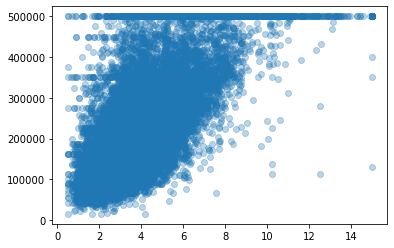

In [5]:
#5) (Notice that there are different scales. 
#Look at the median_house_value and the median_income
#these should really be on the same scale! -- 
#You don't have to do anything about it, now, though!) 
#Use Matplotlib to graph the median_income(x axis) and median_house_value 
#(y axis)
#using a scatter plot. Set alpha 
#(the transparency value to a low value, below it is set to .3)
plt.scatter(df['median_income'], df['median_house_value'], alpha=.3)

### EXTRA CREDIT
- Create two new colums that are the scaled or normalized versions of  the median_house_value and the median income columns
- In a markdown cell, describe which method you used and why

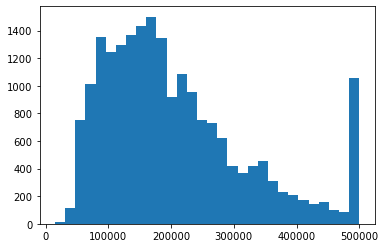

In [6]:
#6)plot the median_house_value as a histogram, use the option bins setting 
#it to at least 30
plt.hist(df['median_house_value'], bins=30);

In [7]:
#7) Do you see anything interesting from these two plots?
#There is a strange peak at the end of median_house_value. 
#Find that value and print out.
df['median_house_value'].max()

500001.0

In [8]:
#8) Put the answer to this question in a markdown cell. 
#Why might this be the case?

put your answer in this markdown cell here:

There is a strange peak at the end because there is a large amount of rows that have 500001.00 or wrong information that causes the peak at the end.

In [9]:
#9) 
#how many lines of data have a median_house_value of exactly 500001.00
len(df.loc[df['median_house_value'] == 500001.00])

965

In [10]:
#10) check to see the types of all columns in the dataset
print(df.dtypes)

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object


In [11]:
#11) are there any missing values?
#print how many missing values there are per column
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#12) Fill the missing data in total_bedrooms with the median 
#value of that column
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [9]:
#13) Show that there are no more missing values (you can do this 
#in other ways too!)
df.isna().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [10]:
#14) remove all lines with the  median house value of 500001.0
df = df[df['median_house_value'] != 500001.0]
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [15]:
#15) There is one category feature (all the rest are float)
#what are the possible values of this category?
df['ocean_proximity'].value_counts()

<1H OCEAN     8604
INLAND        6524
NEAR OCEAN    2446
NEAR BAY      2096
ISLAND           5
Name: ocean_proximity, dtype: int64

<AxesSubplot:>

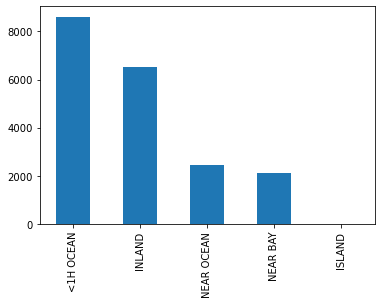

In [11]:
#16) give a bar plot to see how many of each of this category there are
df.ocean_proximity.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ocean_proximity', ylabel='median_house_value'>

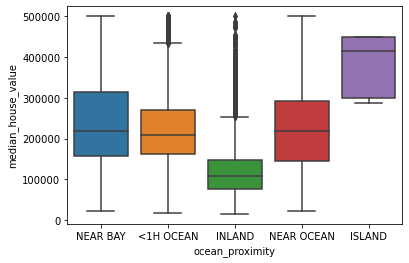

In [14]:
#17)
#let us use seaborn to see how prices are distributed for the different areas
# You can use a boxplot, violin plot, scatter plot, whichever you want!
sns.boxplot(data=df, x = df['ocean_proximity'], y=df['median_house_value'])

In [ ]:
#17-2.1) E.C. Show a second plot that gives this category distribution


In [ ]:
#17-2.2) EC is there a difference in price for older houses and 
#younger houses? Do same as above for houses over the median age and 
#under the median age

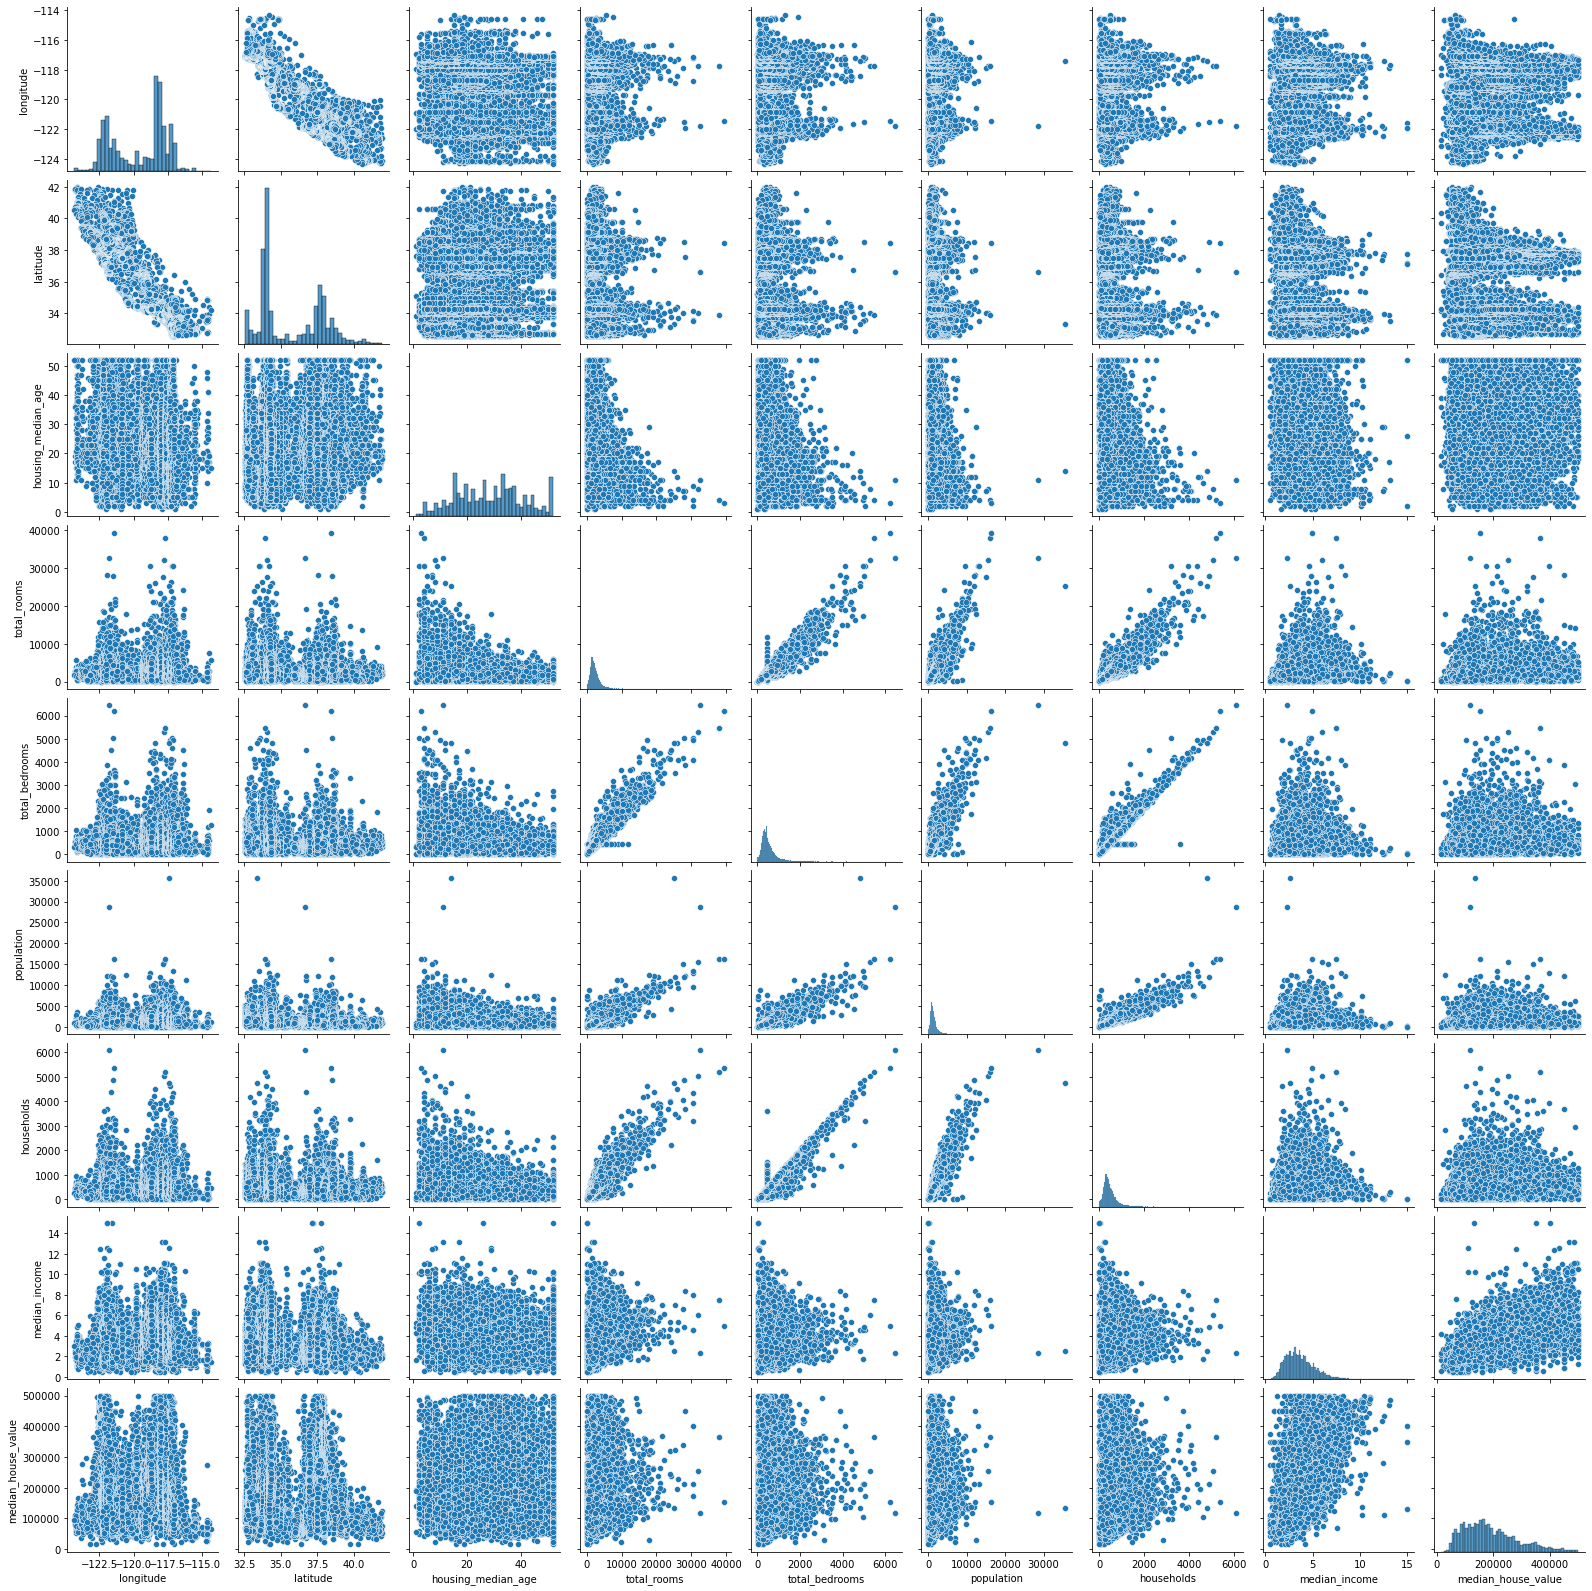

In [15]:
#18) Use pairplot to see the correlation between all features. 
#record your observations in a markdown cell!
sns.pairplot(df)

<AxesSubplot:>

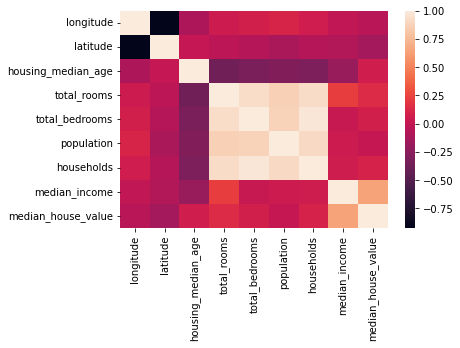

In [17]:
#19) #Show a heat map to determine if  your observations correct
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns)

Text(0, 0.5, 'latitude')

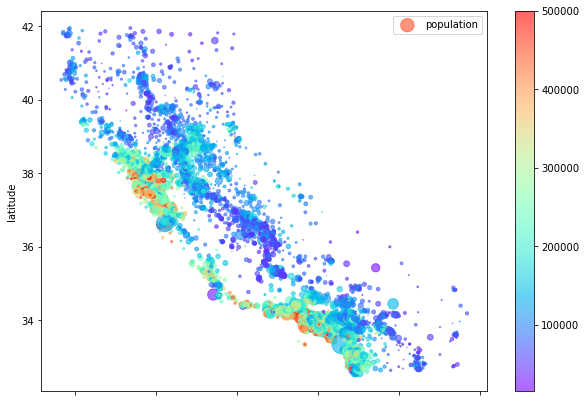

In [30]:
#20) look at the iris dataset that  we plotted together in class (there were
#four features plotted, one was x axis, one was y axis one was size and
#one was the color
#let us do the same thing here, x axis as longitude, y axis as latitude,  size the population divided by 100 and 
#the color to the median_house_value. Use whatever cmap (colormap) you want!
#You should get a California shaped plot, showing the population, house prices!

plt.figure(figsize=(10,7))
plt.scatter(df['longitude'], df['latitude'], s=df['population']/100, c=df['median_house_value'], cmap='rainbow', alpha=0.6)
plt.legend(['population'])
plt.colorbar()
plt.tick_params(labelbottom=False)
plt.ylabel('latitude')